# Summary

Bellabeat, is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

# Phase 1: Ask
### Questions for Analysis

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

### The Business Task

Identify trends in how consumers use other smart devices to apply insights to BellaBeat's market strategy.

# Phase 2: Prepare

### What Data are we using?

The data is a public dataset "Fitbit Fitness Tracker Data" made available through Mobious, and found on Kaggle. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. 

The data was broken down into csv files which were grouped into 2 folders denoting 2 separate 31 day windows. The following files were omitted:

  dailycalories, dailyintensities, dailysteps, dailysleep; for only having data within one of the 31 day timeframes.
  minutecalories,minuteintensitiesminuteMETS, and minutesteps since the data is also captured in the hourly files.

This leaves us: daily_activity, hourly_calories, hourly_intensities, hourly_steps, weight, and heartrate_seconds

# Phase 3: Process

We'll start by installing and loading the packages we'll use


In [1]:
library("tidyverse")
library("here")
library("skimr")
library("janitor")
library("plyr")
library("dplyr")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


here() starts at /kaggle/working




Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




------------------------------------------------------------------------------



You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)



------------------------------------------------------------------------------




Attaching package: ‘plyr’




The following object is masked from ‘package:here’:

    here




The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




The following object is masked from ‘package:purrr’:

    compact




### Importing Datasets

The data was renamed to _1 for the first timeframeand _2 for the second timeframe to be able to later combine them. 

In [2]:
daily_activity_1 <- read.csv("/kaggle/input/fitbit-dataset/dailyActivity_merged_1.csv")
daily_activity_2 <- read.csv("/kaggle/input/fitbit-dataset/dailyActivity_merged_2.csv")

hourly_calories_1 <-read.csv("/kaggle/input/fitbit-dataset/hourlyCalories_merged_1.csv")
hourly_calories_2 <-read.csv("/kaggle/input/fitbit-dataset/hourlyCalories_merged_2.csv")

hourly_intensities_1 <- read.csv("/kaggle/input/fitbit-dataset/hourlyIntensities_merged_1.csv")
hourly_intensities_2 <- read.csv("/kaggle/input/fitbit-dataset/hourlyIntensities_merged_2.csv")

hourly_steps_1 <- read.csv("/kaggle/input/fitbit-dataset/hourlySteps_merged_1.csv")
hourly_steps_2 <- read.csv("/kaggle/input/fitbit-dataset/hourlySteps_merged_2.csv")

weight_1 <- read.csv("/kaggle/input/fitbit-dataset/weightLogInfo_merged_1.csv")
weight_2 <- read.csv("/kaggle/input/fitbit-dataset/weightLogInfo_merged_2.csv")

minute_sleep_1 <- read.csv("/kaggle/input/fitbit-dataset/minuteSleep_merged_1.csv")
minute_sleep_2 <- read.csv("/kaggle/input/fitbit-dataset/minuteSleep_merged_2.csv")

seconds_heartrate_1<-read.csv("/kaggle/input/fitbit-dataset/heartrate_seconds_merged_1.csv")
seconds_heartrate_2<-read.csv("/kaggle/input/fitbit-dataset/heartrate_seconds_merged_2.csv")

### Fixing and Formatting

There is an overlap in data recorded between the 2 months where some users have
duplicate data on April 12th. We'll remove those lines from the 1st period before
merging our data

In [3]:
daily_activity_1 <- filter(daily_activity_1,!ActivityDate=="4/12/2016")

The other dateframes are based off date and time and will have to be broken down into
separate "Date" and "Time" columns to remove the overlapping data

In [4]:
hourly_calories_1[c("date", "time")] <- str_split_fixed(hourly_calories_1$ActivityHour, " " , 2) 
hourly_calories_1 <- filter(hourly_calories_1,!date== "4/12/2016")

Then reformatted back to the columns of the original dataframes

In [5]:
hourly_calories_1 <- hourly_calories_1[c("Id","ActivityHour","Calories")]

Now let's do that for the remaining dataframes

In [6]:
hourly_intensities_1[c("date", "time")] <- str_split_fixed(hourly_intensities_1$ActivityHour, " " , 2) 
hourly_intensities_1 <- filter(hourly_intensities_1,!date== "4/12/2016")
hourly_intensities_1 <- hourly_intensities_1[c("Id","ActivityHour","TotalIntensity","AverageIntensity")]

hourly_steps_1[c("date", "time")] <- str_split_fixed(hourly_steps_1$ActivityHour, " " , 2) 
hourly_steps_1 <- filter(hourly_steps_1,!date== "4/12/2016")
hourly_steps_1 <- hourly_steps_1[c("Id","ActivityHour","StepTotal")]

weight_1[c("date", "time")] <- str_split_fixed(weight_1$Date, " " , 2) 
weight_1 <- filter(weight_1,!date== "4/12/2016")
weight_1 <- weight_1[c("Id","Date","WeightKg","WeightPounds","Fat","BMI","IsManualReport","LogId")]

seconds_heartrate_1[c("date", "time")] <- str_split_fixed(seconds_heartrate_1$Time, " " , 2) 
seconds_heartrate_1 <- filter(seconds_heartrate_1,!date== "4/12/2016")
seconds_heartrate_1 <- seconds_heartrate_1[c("Id","Time","Value")]

Now we'll combine the data of both months into one dataframe

In [7]:
activity_daily <- rbind(daily_activity_1, daily_activity_2)
calories_hourly <- rbind(hourly_calories_1, hourly_calories_2)
intensities_hourly <- rbind(hourly_intensities_1,hourly_intensities_2)
steps_hourly <- rbind(hourly_steps_1,hourly_steps_2)
weight <- rbind(weight_1,weight_2)
sleep_minutes <- rbind(minute_sleep_1,minute_sleep_2)
heartrate_seconds <-rbind(seconds_heartrate_1,seconds_heartrate_2)

Now we'll verify unique number of users to see sample size and remove datasets from analysis that have too small of a sample size

In [8]:
n_unique(activity_daily$Id) 
n_unique(calories_hourly$Id)
n_unique(intensities_hourly$Id)
n_unique(steps_hourly$Id)
n_unique(weight$Id) 
n_unique(sleep_minutes$Id)
n_unique(heartrate_seconds$Id)

[1] 35

[1] 35

[1] 35

[1] 35

[1] 13

[1] 25

[1] 15

We'll remove weight,sleep, and heartrate from our analysis portion of our project due to the small sample size, and we'll bring up the lower use of these features in our recommendations. 

Now lets take a look at samples of the data of our main datasets.

In [9]:
head(activity_daily)
head(calories_hourly)
head(intensities_hourly)
head(steps_hourly)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,3/25/2016,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819
2,1503960366,3/26/2016,17609,11.55,11.55,0,6.92,0.73,3.91,0,89,17,274,588,2154
3,1503960366,3/27/2016,12736,8.53,8.53,0,4.66,0.16,3.71,0,56,5,268,605,1944
4,1503960366,3/28/2016,13231,8.93,8.93,0,3.19,0.79,4.95,0,39,20,224,1080,1932
5,1503960366,3/29/2016,12041,7.85,7.85,0,2.16,1.09,4.61,0,28,28,243,763,1886
6,1503960366,3/30/2016,10970,7.16,7.16,0,2.36,0.51,4.29,0,30,13,223,1174,1820


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,3/12/2016 12:00:00 AM,48
2,1503960366,3/12/2016 1:00:00 AM,48
3,1503960366,3/12/2016 2:00:00 AM,48
4,1503960366,3/12/2016 3:00:00 AM,48
5,1503960366,3/12/2016 4:00:00 AM,48
6,1503960366,3/12/2016 5:00:00 AM,48


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,3/12/2016 12:00:00 AM,0,0
2,1503960366,3/12/2016 1:00:00 AM,0,0
3,1503960366,3/12/2016 2:00:00 AM,0,0
4,1503960366,3/12/2016 3:00:00 AM,0,0
5,1503960366,3/12/2016 4:00:00 AM,0,0
6,1503960366,3/12/2016 5:00:00 AM,0,0


,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,3/12/2016 12:00:00 AM,0
2,1503960366,3/12/2016 1:00:00 AM,0
3,1503960366,3/12/2016 2:00:00 AM,0
4,1503960366,3/12/2016 3:00:00 AM,0
5,1503960366,3/12/2016 4:00:00 AM,0
6,1503960366,3/12/2016 5:00:00 AM,0


### Cleaning

We'll clean the data within each dataframe and get all of the columns under the same case rules.

In [10]:
activity_daily <- clean_names(activity_daily)
calories_hourly <- clean_names(calories_hourly)
intensities_hourly <- clean_names(intensities_hourly)
steps_hourly <- clean_names(steps_hourly)

Now we'll get activity_daily into the correct date format

In [11]:
activity_daily <- activity_daily %>% 
  mutate(activity_date = as_date(activity_date, format = "%m/%d/%Y"))

And arrange it by ID and date.

In [12]:
activity_daily <- activity_daily %>% 
  arrange(id, activity_date)

We are going to merge the hourly datasets and then ensure the date/time are 
actually in a date/time format.

In [13]:
all_data_hourly <- merge(calories_hourly,intensities_hourly, by=c("id", "activity_hour"))
all_data_hourly <- merge(all_data_hourly,steps_hourly, by=c("id", "activity_hour"))

In [14]:
all_data_hourly[c("date", "time")] <- str_split_fixed(all_data_hourly$activity_hour, " " , 2) 
all_data_hourly$activity_hour=as.POSIXct(all_data_hourly$activity_hour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
all_data_hourly$time <- format(all_data_hourly$activity_hour, format = "%H:%M:%S")

And then arrange by ID and date_time.

In [15]:
all_data_hourly <- all_data_hourly %>% 
  arrange(id,activity_hour)

# Phase 4 & 5: Analyze & Share

We're going to see how many days each user used their device and summarize them into high use, moderate use, and low use categories.

In [16]:
use_daily <- activity_daily %>%
  dplyr::group_by(id) %>%
  dplyr::summarise(days_used=sum(n())) %>%
  mutate(usage = case_when(
    days_used >= 1 & days_used <= 20 ~ "low use",
    days_used >= 21 & days_used <= 40 ~ "moderate use", 
    days_used >= 41 & days_used <= 62 ~ "high use", 
  ))

Now let's see what percentages of people fall into which category.

In [17]:
use_daily_percent <- use_daily %>%
  dplyr::group_by(usage) %>%
  dplyr::summarise(total = n()) %>%
  dplyr::mutate(totals = sum(total)) %>%
  dplyr::group_by(usage) %>%
  dplyr::summarise(total_percent = total / totals) %>%
  dplyr::mutate(percentage = scales::percent(total_percent))


use_daily_percent <- dplyr::arrange(use_daily_percent,desc(total_percent))

And create a pie chart of those percentages

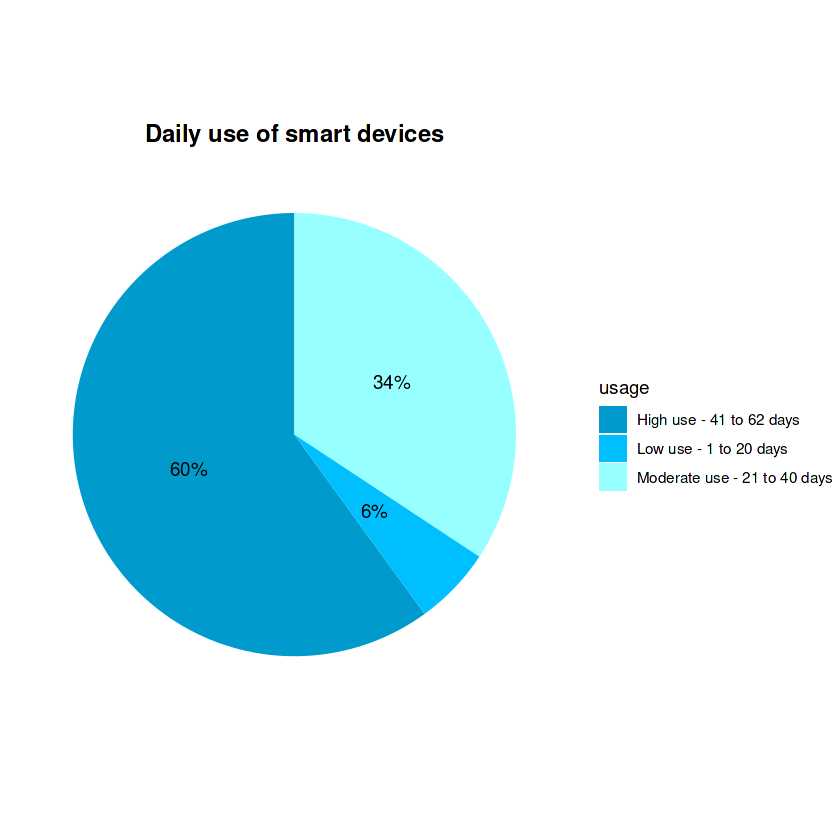

In [18]:
use_daily_percent %>%
  ggplot(aes(x="",y=total_percent, fill=usage)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  geom_text(aes(label = percentage),
            position = position_stack(vjust = 0.5))+
  scale_fill_manual(values = c("deepskyblue3","deepskyblue","darkslategray1"),
                    labels = c("High use - 41 to 62 days",
                               "Low use - 1 to 20 days",
                               "Moderate use - 21 to 40 days"))+
  labs(title="Daily use of smart devices")

Now that we now how often people are using the product, let's see what type of
users are using the product based off activity level. 

In [19]:
average_steps <-  ddply(activity_daily, .(id), summarize, avg_steps=mean(total_steps)) %>%
  mutate(activity_level = case_when(
    avg_steps >=0 & avg_steps < 2500 ~ "6_basal",
    avg_steps >= 2500 & avg_steps < 5000 ~ "5_limited", 
    avg_steps >= 5000 & avg_steps < 7500 ~ "4_low",
    avg_steps >= 7500 & avg_steps < 10000 ~ "3_somewhat",
    avg_steps >= 10000 & avg_steps < 12500 ~ "2_active",
    avg_steps >= 12500 ~ "1_highly_active",
  ))

daily_averages <-merge(use_daily,average_steps,"id")

avg_steps_percent <- daily_averages %>%
  dplyr::group_by(activity_level) %>%
  dplyr::summarise(total = n()) %>%
  dplyr::mutate(totals = sum(total)) %>%
  dplyr::group_by(activity_level) %>%
  dplyr::summarise(total_percent = total / totals) %>%
  dplyr::mutate(percentage = scales::percent(total_percent))

And create a pie chart of those percentages.

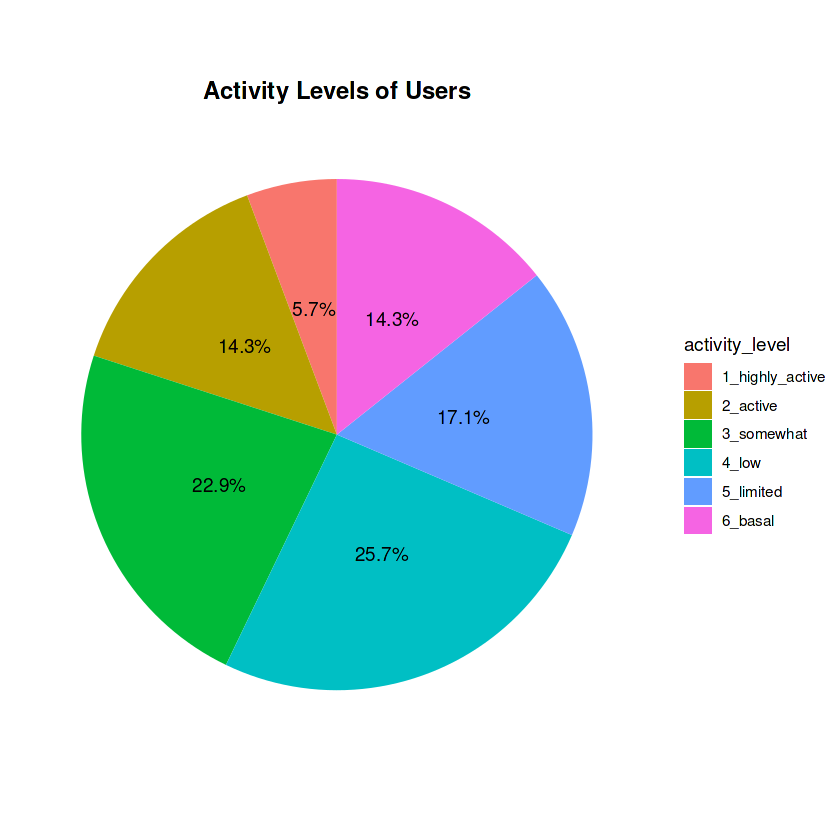

In [20]:
avg_steps_percent %>%
  ggplot(aes(x="",y=total_percent, fill=activity_level)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  geom_text(aes(label = percentage),
            position = position_stack(vjust = 0.5))+  
  
  labs(title="Activity Levels of Users")

Now we'll compare categories of users to activity level.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


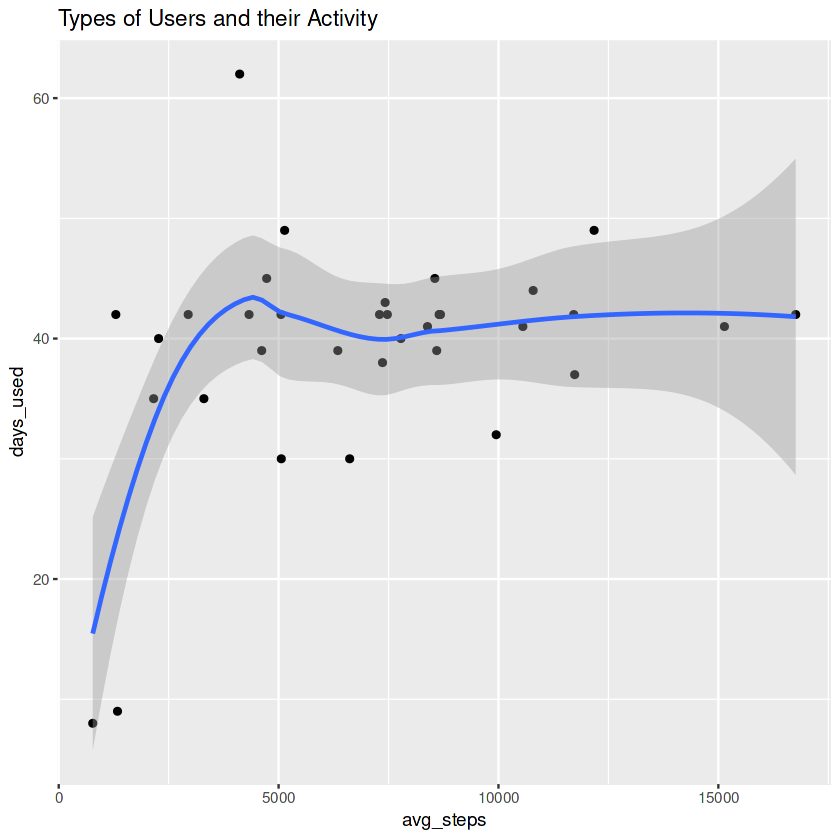

In [21]:
daily_averages %>% 
  ggplot(aes(avg_steps,days_used)) + geom_point() +geom_smooth()+
  labs(title="Types of Users and their Activity")

Based off our pie charts and scatter plot we can see that most users fall within low to moderate activity level over this two month period. 

Now we'll look at how active our users are throughout the day. 

Warning message in geom_histogram(stat = "identity", fill = "darkblue"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


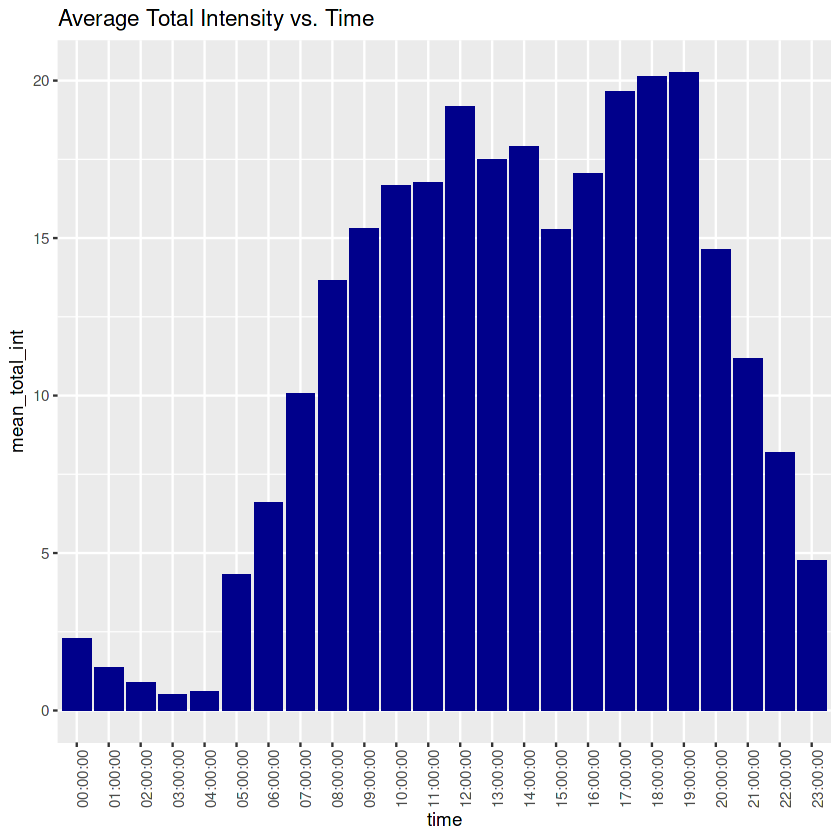

In [22]:
int_new <- all_data_hourly %>%
  dplyr::group_by(time) %>%
  tidyr::drop_na() %>%
  dplyr::summarise(mean_total_int = mean(total_intensity))

ggplot(data=int_new, aes(x=time, y=mean_total_int)) + geom_histogram(stat = "identity", fill='darkblue') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time")

We can see that most people are active during lunchtime and just after when most people would get out of a "9-5" job. 

Lastly we'll take a lok at how the umber of users changed over time during this two month period. 

Warning message in geom_histogram(stat = "identity", fill = "darkblue"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


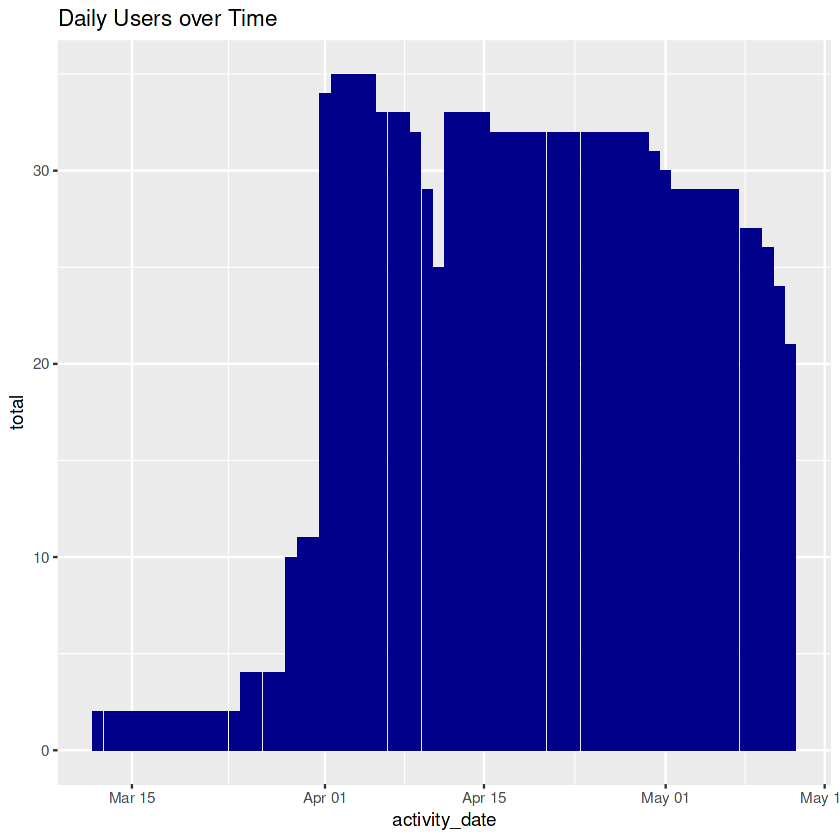

In [23]:
activity_by_day <- activity_daily %>% 
  dplyr::group_by(activity_date) %>%
  dplyr::summarise(total = n())
 
ggplot(data=activity_by_day, aes(x=activity_date,y=total))+ geom_histogram(stat="identity", fill="darkblue") +
  labs(title="Daily Users over Time")


We see a sharp uptick near the beginning of the study, but during the last few weeks we see the start of a significant dropoff of users. 

# Phase 6: Act

Based off the available data I'd make the following recommendations to Bellabeat's marketing team:

1. Due to the low use of features such as weight, sleep readings, and heartrate, Bellabeat could introduce a scale that automatically updates weight from a scale to the app, much like the water bottle they are currently marketing. They coud also look into why a lot of people do not use the sleep functionality of the smart devices.

2. Based off the data that most users are in the lower to middle groups of activity levels. Bellabeat could tailor their ads to people who are lightly active and speak to the benefits of being able to track your activity and immprove upon it such as step/calorie/intensity goals.

3. Finally they would want to look into getting additional data about why people stop using smart devices for health tracking after about 1-2 months. Once they get additional data they could tailor marketing and subscription reminders based off when people would be most likely to re-new the subscription or not. They would also want to market the longevity and benefits of using Bellabeats for a long period. 
